In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

# Input Dataset 

In [2]:
le = LabelEncoder()
df = pd.read_csv('./Data.csv',index_col=0)

In [3]:
df =  shuffle(df).reset_index(drop=True)

# Data Exploration

In [4]:
df.head()

,age,sex,region,income,married,children,car,saving_acc,current_acc,mortgage,loan
0,52,FEMALE,TOWN,43719.5,YES,0,NO,YES,YES,NO,NO
1,24,FEMALE,INNER_CITY,13864.6,YES,3,NO,YES,YES,NO,YES
2,23,FEMALE,RURAL,11215.3,YES,2,YES,YES,YES,NO,YES
3,27,FEMALE,INNER_CITY,11866.4,YES,0,YES,YES,YES,NO,NO
4,46,FEMALE,TOWN,41627.1,YES,0,NO,YES,YES,YES,NO


In [5]:
print('Missing Values: ')

Missing Values: 


In [6]:
df.isnull().sum()

age            0
sex            0
region         0
income         0
married        0
children       0
car            0
saving_acc     0
current_acc    0
mortgage       0
loan           0
dtype: int64

In [7]:
print('Data Description: ')

Data Description: 


In [8]:
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null int64
car            600 non-null object
saving_acc     600 non-null object
current_acc    600 non-null object
mortgage       600 non-null object
loan           600 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 51.6+ KB


In [10]:
for cols in ['sex','region','married','car','saving_acc', 'current_acc', 'mortgage', 'loan','region']:
    df[cols] = df[cols].astype('category')
df['age'] = df['age'].astype('int32')
df['income'] = df['income'].astype('float64')
df['children'] = df['children'].astype('int32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int32
sex            600 non-null category
region         600 non-null category
income         600 non-null float64
married        600 non-null category
children       600 non-null int32
car            600 non-null category
saving_acc     600 non-null category
current_acc    600 non-null category
mortgage       600 non-null category
loan           600 non-null category
dtypes: category(8), float64(1), int32(2)
memory usage: 15.0 KB


# Contigency tables for catagorical attributes

In [12]:
pd.crosstab(df['sex'],df['loan'])

loan,NO,YES
sex,,
FEMALE,170,130
MALE,156,144


In [13]:
pd.crosstab(df['region'],df['loan'])

loan,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


In [14]:
pd.crosstab(df['married'],df['loan'])

loan,NO,YES
married,,
NO,84,120
YES,242,154


In [15]:
pd.crosstab(df['children'],df['loan'])

loan,NO,YES
children,,
0,167,96
1,25,110
2,79,55
3,55,13


In [16]:
pd.crosstab(df['car'],df['loan'])

loan,NO,YES
car,,
NO,168,136
YES,158,138


In [17]:
pd.crosstab(df['saving_acc'],df['loan'])

loan,NO,YES
saving_acc,,
NO,91,95
YES,235,179


In [18]:
pd.crosstab(df['current_acc'],df['loan'])

loan,NO,YES
current_acc,,
NO,82,63
YES,244,211


In [19]:
pd.crosstab(df['mortgage'],df['loan'])

loan,NO,YES
mortgage,,
NO,209,182
YES,117,92


In [20]:
df.corr()

,age,income,children
age,1.000000,0.752726,0.023572
income,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


## Distribution of Age & Income with Loan

In [21]:
x1 = x2 = []

In [22]:
x1 = df.loc[df.loan == 'YES','age']
x2 = df.loc[df.loan == 'NO','age']

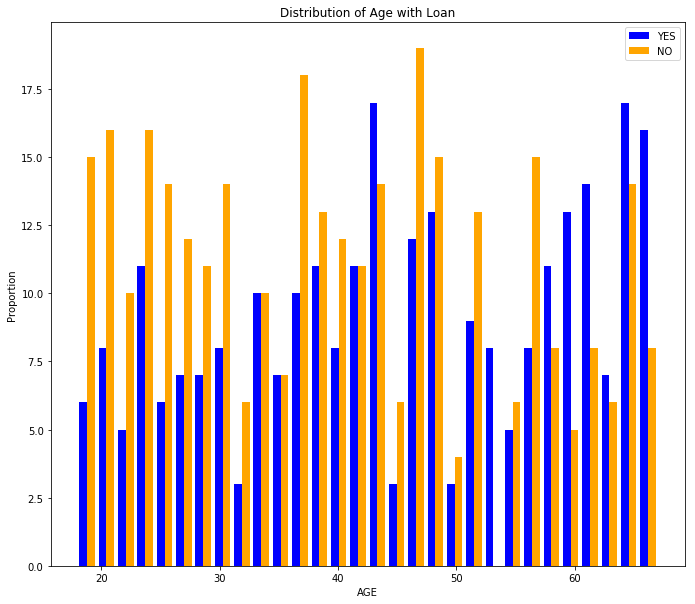

In [60]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(121)
legend = ['YES','NO']
ax.set(title = "Distribution of Age with Loan", ylabel = 'Proportion', xlabel = 'AGE')
ax.hist([x1,x2] ,color = ['blue','orange'], bins = 30, normed = False, label=['blue','orange'])
plt.legend(legend)
plt.show()

In [24]:
k1 = k2 = []

In [25]:
k1 = df.loc[df.loan == 'YES','income']
k2 = df.loc[df.loan == 'NO','income']

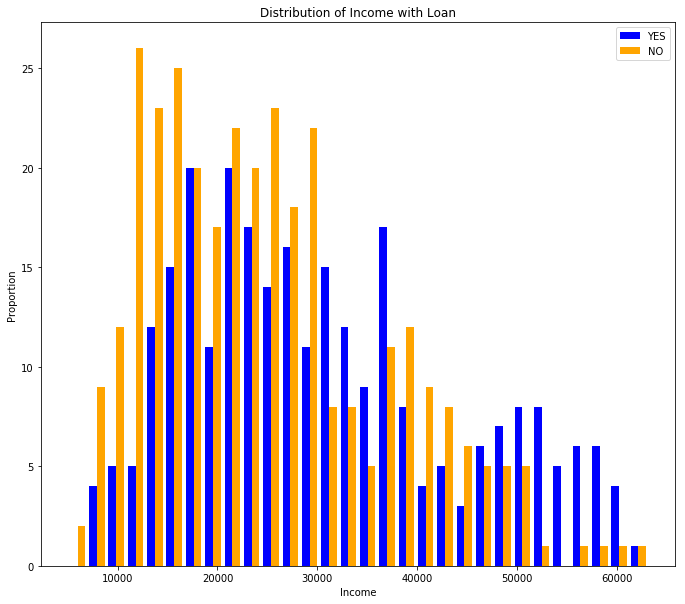

In [26]:
fig1 = plt.figure(figsize = (25,10))
ax1 = fig1.add_subplot(121)
legend = ['YES','NO']
ax1.set(title = "Distribution of Income with Loan", ylabel = 'Proportion', xlabel = 'Income')
ax1.hist([k1,k2] ,color = ['blue','orange'], bins = 30, normed = False)
plt.legend(legend)
plt.show()

## Age & Income Bucketing

In [61]:
y = df.iloc[:,[10]]
X = df.iloc[:,0:10]
z = list(X.columns.values)
z.remove('income')
y = le.fit_transform(y)
for name in z:
    X[name] = le.fit_transform(X[name])

In [28]:
def age_convert(age):
    if (age < 35):
        return 1
    elif (35<= age <= 55):
        return 2
    else:
        return 3

In [29]:
def income_convert(income):
    if (income < 5000):
        return 1
    elif (5000 <= income <= 33000):
        return 2
    elif (33000 < income < 61000):
        return 3
    else:
        return 4

In [30]:
X['age_conv'] = X['age'].apply(lambda k:age_convert(k))
X = X.drop(labels = ['age'], axis = 1)

In [31]:
import math
X['income'] = X['income'].apply(lambda X:math.floor(X))
X['income_conv'] = X['income'].apply(lambda k:income_convert(k))
X = X.drop(labels = ['income'], axis = 1)

# Feature Selection

In [32]:
feature_cols = list(X.columns.values)

In [33]:
print(feature_cols)

['sex', 'region', 'married', 'children', 'car', 'saving_acc', 'current_acc', 'mortgage', 'age_conv', 'income_conv']


# Model Construction

In [34]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### Preprocessing on catagorical variables

In [35]:
from sklearn import preprocessing
pp = preprocessing.LabelEncoder()
for cols in ['sex', 'region', 'married', 'children', 'car', 'saving_acc', 'current_acc', 'mortgage']:
    X[cols] = pp.fit_transform(X[cols])
y = pp.fit_transform(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

## Choosing Decision Tree parameters

In [37]:
dtparams = {"criterion": ["gini", "entropy"], 
              'max_depth':range(4,16), 
              'min_samples_leaf' : range(4,20), 
              'max_leaf_nodes':range(10,15)}

In [38]:
gscv = GridSearchCV(DecisionTreeClassifier(), dtparams, n_jobs = 4, cv = 10, scoring = 'f1', refit = 'f1')
gscv.fit(X = X_train, y = y_train)

/Users/vinayknvr/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_leaf_nodes': [10, 11, 12, 13, 14], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score='warn',
       scoring='f1', verbose=0)

In [39]:
print (gscv.best_score_, gscv.best_params_)

(0.8300368355742084, {'max_leaf_nodes': 14, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6})


In [62]:
res_df = pd.DataFrame(gscv.cv_results_)

In [41]:
res_df['mean_train_score'].max()

0.8492345151597016

In [42]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 6, 
                               max_leaf_nodes = 14, min_samples_leaf = 8 )

In [43]:
clf = model.fit(X_train, y_train)

In [44]:
y_pred = model.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[79, 13],
       [13, 75]])

# Model Visualization

In [46]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  

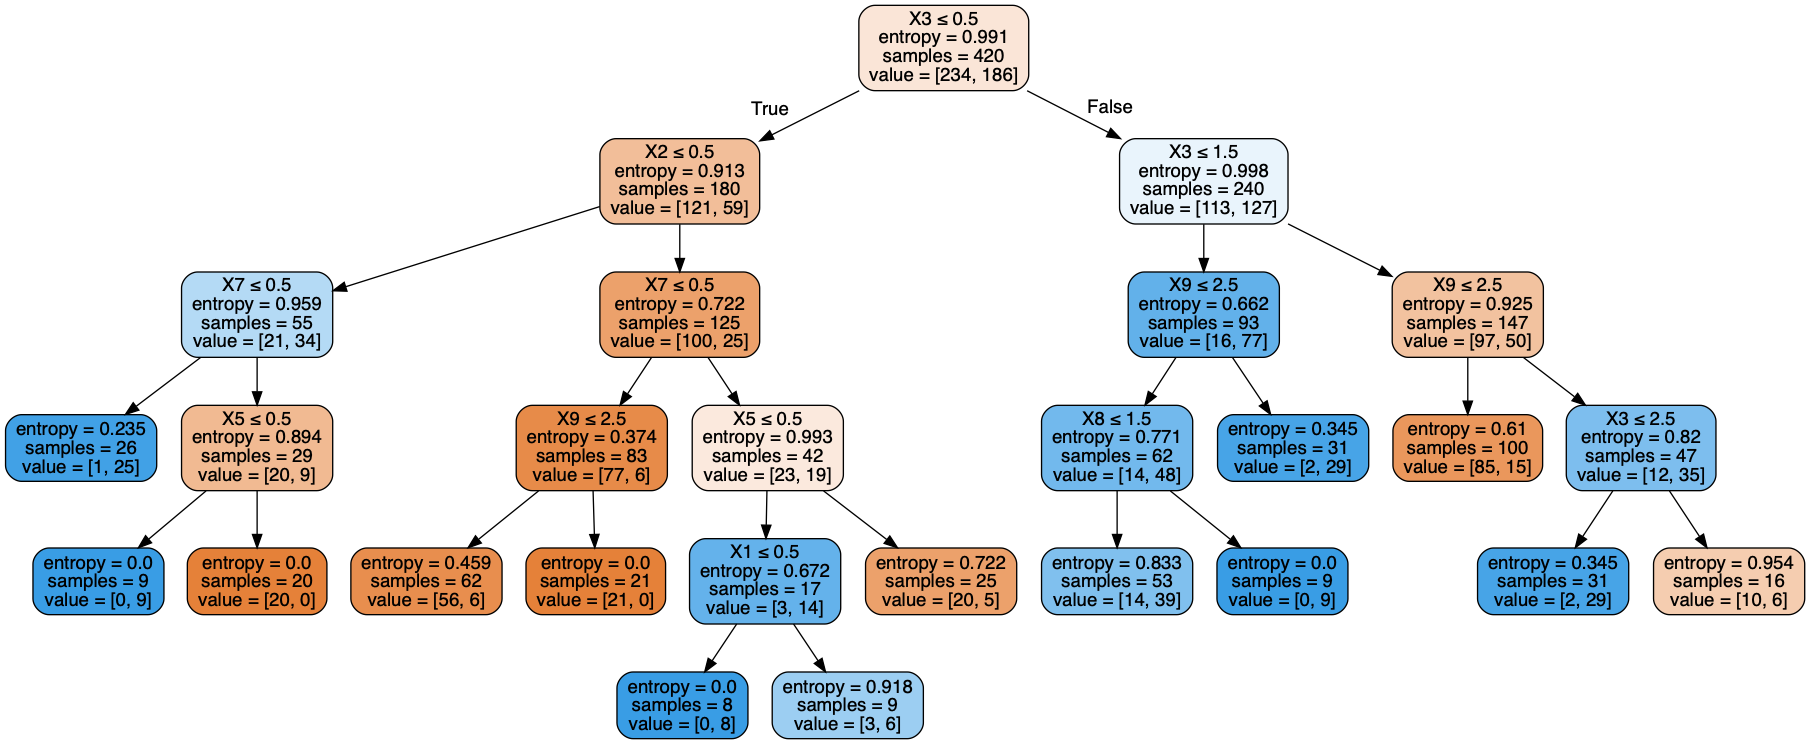

In [47]:
from IPython.display import Image  
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Model Evaluation

In [48]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')

85.6% accuracy


In [50]:
rascore = roc_auc_score(y_test, y_pred)
print(rascore)

0.8554841897233202


### Precision vs Recall plot

In [51]:
cls_report = classification_report(y_test,y_pred)
print cls_report 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        92
           1       0.85      0.85      0.85        88

   micro avg       0.86      0.86      0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



Text(0.5,1,'Precision vs Recall plot: ')

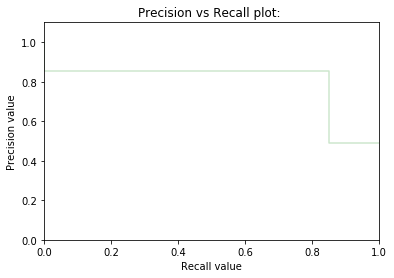

In [52]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.xlabel('Recall value')
plt.ylabel('Precision value')
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 1.0])
plt.title('Precision vs Recall plot: ')

# ROC Curve Plotting

In [53]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [54]:
model.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [55]:
probs = model.predict_proba(X_test)  

In [56]:
probs = probs[:, 1]

In [57]:
auc = roc_auc_score(y_test, y_pred)  
print('AUC: %.2f' % auc)

AUC: 0.86


In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  

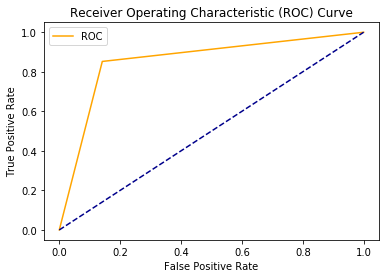

In [59]:
plot_roc_curve(fpr, tpr)  